# Exploring Review Data
- let's look at some typical reviews, how many files there are, what the distributions of review lengths and hours played are, etc.

In [1]:
# Pretty much, this is my standard header because I use these following
# two libraries all the time
import sys
import os

In [2]:
# So, let's take a look at how many lines are in our reviews files
# Note: I just started processing GTAV after ending all the other processes
os.chdir('/home/mulhollandm2/reviews_project/reviewer_experience_prediction')
! wc -l data/*.txt

   30910 data/Arma_3.txt
   66500 data/Counter_Strike_Global_Offensive.txt
   17712 data/Counter_Strike.txt
   61900 data/Dota_2.txt
    2346 data/Football_Manager_2015.txt
   65860 data/Garrys_Mod.txt
   19880 data/Grand_Theft_Auto_V.txt
   67076 data/Sid_Meiers_Civilization_5.txt
   63840 data/Team_Fortress_2.txt
   65578 data/The_Elder_Scrolls_V.txt
   49270 data/Warframe.txt
  510872 total


In [4]:
# This is a stripped-down version of the function in read_data_files.py
# Note: I decided to get rid of the language identification rule for the time
# being because I don't want this function to take too long or else it will be
# useless in this context. We will still use the rule, just not in this
# notebook setting.
def get_reviews_for_game(file_name):
    '''
    Get list of reviews in a single game file.

    :param file_name: name of file
    :type file_name: str
    :returns: list of dicts
    '''

    reviews = []
    lines = open(file_name).readlines()
    i = 0
    while i + 1 < len(lines): # We need to get every 2-line couplet
        # Extract the hours value and the review text from each 2-line
        # sequence
        try:
            h = float(lines[i].split()[1].strip())
            r = lines[i + 1].split(' ', 1)[1].strip()
        except (ValueError, IndexError) as e:
            i += 2
            continue
        reviews.append(dict(hours=h,
                            review=r))
        i += 2 # Increment i by 2 since we need to go to the next
            # 2-line couplet
    return reviews

# Football Manager 2015 Stats

In [5]:
# So, let's first get all of the reviews for the game with the smallest amount of
# review data, i.e., Football Manager 2015 (not including GTAV)
reviews = get_reviews_for_game('data/Football_Manager_2015.txt')

In [6]:
# First of all, how many reviews are there?
print('number of reviews: {}'.format(len(reviews)))

number of reviews: 1173


In [7]:
# Here's a couple reviews from the beginning of the file
reviews[:3]

[{'hours': 237.9,
  'review': "ive bought this game for many years and think this might be my last. firstly im not keen on spending 30 a year on something that could be released as an update. the lack of competition in the manager genre has made SI very lazy, to the point where they make one or two small changes and market it as a new game. here are some of the points where my problems lie -ridiculous injurys, in my first season there was not one point where i didnt have at least six players injured -how many times in real football does a team make all its subs then a player gets injured and they finish the game with 10 men? well in FM about one in three games but amazingly never to the computer opponent -its almost impossible to generate any momentum anymore in FM, you will be playing well then suddenly lose for no reason -football has always been in the headlines for footballers astronomical wages, thank god its not like FM, youth players who have never made a first team appearance a

# Football Manager 2015: Review Length Distribution

In [8]:
# Let's measure the lengths of each review using a "list comprehension"
lengths = [len(review['review']) for review in reviews]
# Let's print out the first 10 lengths, just to see what we're working with
lengths[:10]

[1669, 4072, 1126, 3370, 60, 1283, 954, 1127, 65, 1309]

In [9]:
# Compute the average length value
avg_len = sum(lengths)/len(lengths)
print('average length: {}'.format(avg_len))

average length: 369.1381074168798


In [10]:
min_len = min(lengths)
print('minimum review length = {}'.format(min_len))

minimum review length = 1


In [11]:
max_len = max(lengths)
print('maximum review length = {}'.format(max_len))

maximum review length = 5818


In [9]:
import numpy as np

In [12]:
_lengths = np.array(lengths)

In [42]:
std = _lengths.std()

In [43]:
_lengths.size

1173

In [45]:
bins = std/10.0
_rounded_lengths = np.array([ceil(l/bins)*bins for l in lengths])
_rounded_lengths

array([1721., 4119., 1168., ..., 61., 61., 184.])

In [37]:
# Let's try to make a list of rounded length values where we round to the nearest
# 300 (I know, that's a pretty strange kind of thing to do)
from math import ceil
# We can do this by diving each length by 300, then rounding up, then multiplyig by 300
rounded_lengths = [ceil(l/60)*60 for l in lengths]
print('original lengths (first 10):          {}\nrounded lengths (to the nearest 300): {}'.format(
    lengths[:10],
    rounded_lengths[:10]))

original lengths (first 10):          [1669, 4072, 1126, 3370, 60, 1283, 954, 1127, 65, 1309]
rounded lengths (to the nearest 300): [1680, 4080, 1140, 3420, 60, 1320, 960, 1140, 120, 1320]


In [46]:
# Now, let's make a frequency distribution with the collections.Counter module
from collections import Counter
rounded_length_fdist = Counter(_rounded_lengths)
rounded_length_fdist

Counter({61.478763487793501: 381, 122.957526975587: 179, 245.915053951174: 95, 184.43629046338049: 90, 307.39381743896752: 60, 430.35134441455449: 41, 368.87258092676097: 36, 491.830107902348: 34, 553.30887139014146: 25, 614.78763487793503: 25, 676.26639836572849: 23, 737.74516185352195: 22, 860.70268882910898: 16, 983.66021580469601: 12, 799.22392534131552: 11, 1168.0965062680766: 10, 922.18145231690255: 9, 1536.9690871948376: 8, 1045.1389792924895: 8, 1721.405377658218: 7, 1106.6177427802829: 7, 1659.9266141704245: 7, 1475.4903237070439: 6, 1291.0540332436635: 5, 1352.532796731457: 5, 1414.0115602192504: 4, 1598.447850682631: 4, 1905.8416681215986: 4, 1967.320431609392: 3, 3381.3319918286425: 3, 2151.7567220727724: 3, 1782.8841411460114: 3, 3073.9381743896752: 2, 4119.0771536821649: 2, 2213.2354855605658: 2, 3627.2470457798167: 2, 2766.5443569507074: 2, 2028.7991950971855: 2, 4364.9922076333387: 1, 2950.9806474140878: 1, 2459.1505395117401: 1, 3750.2045727554037: 1, 2090.277958584978

In [14]:
# It is obvious from looking at the freq. dist. above that length drops off a cliff
# after about 1000 characters
# In fact, for length up to 900, almost 1,050 reviews are accounted for, which means
# that only a little over 100 reviews are thinly-distributed over the remaining area
# above 1,000 characters

In [25]:
# Let's try to print out the freq dist in a nice way
# Bear with me as I attempt to use pandas, which is a very nice Python library
import pandas as pd

In [51]:
# Usually, when you use Pandas, you're using a dataframe, but a dataframe, as I understand
# it, it just made up on a set of "Series"
# Let's make a Series from our rounded lengths and then call its value_counts() method to
# get exactly what collections.Counter was doing (but we'll be able to use it to make a
# nice plot)
rounded_length_series = pd.Series(_rounded_lengths)
rounded_length_series.value_counts()

61.478763      381
122.957527     179
245.915054      95
184.436290      90
307.393817      60
430.351344      41
368.872581      36
491.830108      34
614.787635      25
553.308871      25
676.266398      23
737.745162      22
860.702689      16
983.660216      12
799.223925      11
1168.096506     10
922.181452       9
1045.138979      8
1536.969087      8
1721.405378      7
1659.926614      7
1106.617743      7
1475.490324      6
1352.532797      5
1291.054033      5
1414.011560      4
1598.447851      4
1905.841668      4
2151.756722      3
1782.884141      3
3381.331992      3
1967.320432      3
3073.938174      2
4119.077154      2
2028.799195      2
2213.235486      2
2766.544357      2
3627.247046      2
1229.575270      1
3750.204573      1
2274.714249      1
5225.694896      1
2397.671776      1
2459.150540      1
2520.629303      1
5840.482531      1
3442.810755      1
3135.416938      1
4364.992208      1
4303.513444      1
2950.980647      1
2889.501884      1
2090.277959 

In [17]:
from data import FILTER_DICT
FILTER_DICT['Football_Manager_2015']['MAXLEN']

1200

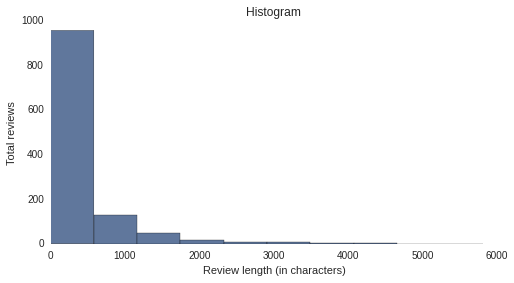

In [104]:
# The table above is nice, but let's do better and try to get a histogram
# Don't worry about all this importing stuff, it's just from something I read in a blog
# post
# Actually, go and check out the blog post here:
# http://nbviewer.ipython.org/github/mwaskom/seaborn/blob/master/examples/plotting_distributions.ipynb
# It's in, you guessed it, an IPython notebook! Shows what you can do with
# matplotlib.
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(pd.Series(lengths), label='Game')
ax.set_xlabel('Review length (in characters)')
ax.set_ylabel('Total reviews')
ax.set_title('Histogram')
fig.savefig('sample_fig')

In [22]:
# That is one nice-looking histogram!
# From it, we can really see just how few reviews there are past 1,000
# For this item, we could probably set the cap at 1,200, let's say
# What do you think?

In [22]:
# If 90% of the reviews have length <= 1200 of the reviews, but not 900,
# let's set MAXLEN to 1200
len([r for r in reviews if len(r['review']) <= 1200])/len(reviews) >= 0.9

True

# Football Manager 2015: Hours Distribution

In [31]:
# Let's do a similar kind of thing for the hours values
hours = [review['hours'] for review in reviews]
hours[:10]

[237.9, 113.0, 1138.7, 194.2, 372.3, 79.7, 1218.2, 386.4, 236.2, 526.4]

In [32]:
print("min: {}\nmax: {}".format(min(hours), max(hours)))

min: 0.2
max: 2482.1


In [33]:
rounded_hours = [ceil(h/200)*200 for h in hours]

In [34]:
rounded_hours[:10]

[400, 200, 1200, 200, 400, 200, 1400, 400, 400, 600]

In [35]:
# Let's use pandas again instead of collections.Counter
rounded_hours_series = pd.Series(rounded_hours)
rounded_hours_series.value_counts()

200     626
400     288
600     127
800      63
1000     22
1200     18
1600      9
1400      7
2000      5
1800      3
2600      2
2200      2
2400      1
dtype: int64

In [28]:
# Hmm, well, would you look at that! The distribution looks exactly the same
# as that for length!

(array([ 914.,  127.,   63.,   22.,   18.,   16.,    3.,    5.,    2.,    3.]),
 array([  200.,   440.,   680.,   920.,  1160.,  1400.,  1640.,  1880.,
         2120.,  2360.,  2600.]),
 <a list of 10 Patch objects>)

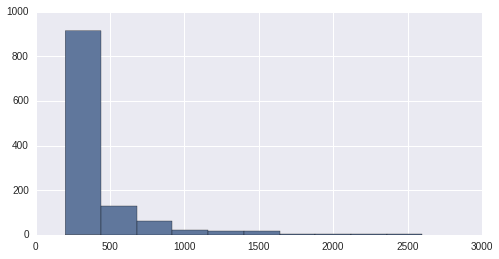

In [36]:
# Let's plot it!
plt.hist(rounded_hours_series)

In [38]:
# If 90% of the reviews have hours values <= 800 of the reviews, but not 600,
# let's set MAXHOURS to 800
len([r for r in reviews if r['hours'] <= 400])/len(reviews) >= 0.9

False

In [29]:
# Playing around with this library called plotly
# Let's try to make a histogram in a slightly different kind of way
import plotly
import plotly.tools as tls
import plotly.plotly as py
from plotly.graph_objs import *
rounded_lengths_data = Data([
                             Histogram(
                                       x=rounded_lengths
                                       )
                             ])

In [30]:
plot_url = py.plot(rounded_lengths_data, filename='basic-histogram')

In [78]:
# Hmm, seems kind of interesting, there's a lot of stuff you can do with
# visualizing the data
# Here's the plot url, but I don't know if anybody but me will be able to see it,
# so, I'm going to try to put the graph directly in the IPython notebook.
plot_url

'https://plot.ly/~mulhod/4'

In [77]:
py.iplot(rounded_lengths_data, filename='basic-histogram')

In [79]:
# It's nice how interactive the graphs from plotly are! Hover around on
# the graph. Also, look at the lower right and right-click the "Play
# with this data! >>" button

In [80]:
# Anyway, this was just an aside. You don't need to do the plotly stuff
# for every game, though it actually does look nicer. Use either plotly or
# matplotlib

# Grand Theft Auto V Stats

In [32]:
reviews = get_reviews_for_game('data/Grand_Theft_Auto_V.txt')
reviews[:3]

[{'hours': 27.8,
  'review': "Game of the year simulator. If you're thinking about buying a game and you don't have GTA5 you basically need this game. BEWARE you need a pretty fast computer to keep up, the game is cheap in comparison to what you might need to spend to get it running but I can play it on a Radeon HD 5870 1GB without much fuss so the fact that it can run on 2009 hardware is pretty impressive. No complaints in the optimization department. I must say, the PC options are fantastic. There is a LOT of tweaking to do, especially in regards to the controller and keyboard settings in addition to the expansive performance tweaks. My favorite part is having a keyboard and mouse and gamepad in front of me and when the game gets to an intense shooting part I can put down my controller and use the keyboard/mouse and start shooting without having to go to a settings menu and change anything. It just works. It's perfect. The gameplay itself needs no introduction. You can do pretty much

# Grand Theft Auto V: Review Length Distribution

In [34]:
lengths = [len(review['review']) for review in reviews]
lengths[:10]

[1129, 39, 68, 63, 85, 79, 357, 203, 2034, 15]

In [35]:
print("min: {}\nmax: {}".format(min(lengths), max(lengths)))

min: 1
max: 7958


In [37]:
rounded_lengths = [ceil(l/300)*300 for l in lengths]
rounded_lengths[:10]

[1200, 300, 300, 300, 300, 300, 600, 300, 2100, 300]

(array([  9.43500000e+03,   3.67000000e+02,   6.70000000e+01,
          3.60000000e+01,   9.00000000e+00,   1.10000000e+01,
          7.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          5.00000000e+00]),
 array([  300.,  1080.,  1860.,  2640.,  3420.,  4200.,  4980.,  5760.,
         6540.,  7320.,  8100.]),
 <a list of 10 Patch objects>)

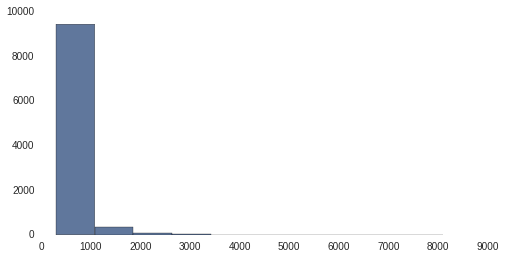

In [39]:
rounded_lengths_series = pd.Series(rounded_lengths)
plt.hist(rounded_lengths_series)

# Grand Theft Auto V: Review Hours Played Distribution

In [40]:
hours = [review['hours'] for review in reviews]
hours[:10]

[27.8, 48.8, 56.0, 59.7, 3.8, 22.5, 19.0, 66.6, 75.8, 61.4]

In [41]:
print("min: {}\nmax: {}".format(min(hours), max(hours)))

min: 0.1
max: 235.0


In [43]:
rounded_hours = [ceil(h/10)*10 for h in hours]
rounded_hours[:10]

[30, 50, 60, 60, 10, 30, 20, 70, 80, 70]

(array([  4.25200000e+03,   2.75000000e+03,   1.63700000e+03,
          9.80000000e+02,   1.96000000e+02,   8.20000000e+01,
          3.10000000e+01,   4.00000000e+00,   6.00000000e+00,
          2.00000000e+00]),
 array([  10.,   33.,   56.,   79.,  102.,  125.,  148.,  171.,  194.,
         217.,  240.]),
 <a list of 10 Patch objects>)

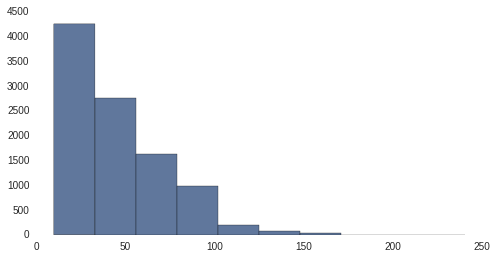

In [44]:
rounded_hours_series = pd.Series(rounded_hours)
plt.hist(rounded_hours_series)

In [45]:
len(reviews)

9940